# Football Quarterback Data Analysis

In this analysis, we will use a dataset containing data for NFL quarterbacks. We will use the dataset to perform a linear regression on certain features and try to predict if a quarterback will win or lose a game. We will also create histograms of the features for two quarterbacks, Davis Mills and Patrick Mahomes.


Enter Player 1 namePatrick Mahomes
Enter Player 2 nameJosh Allen
Mean squared error: 0.17
Coefficient of determination: -0.05


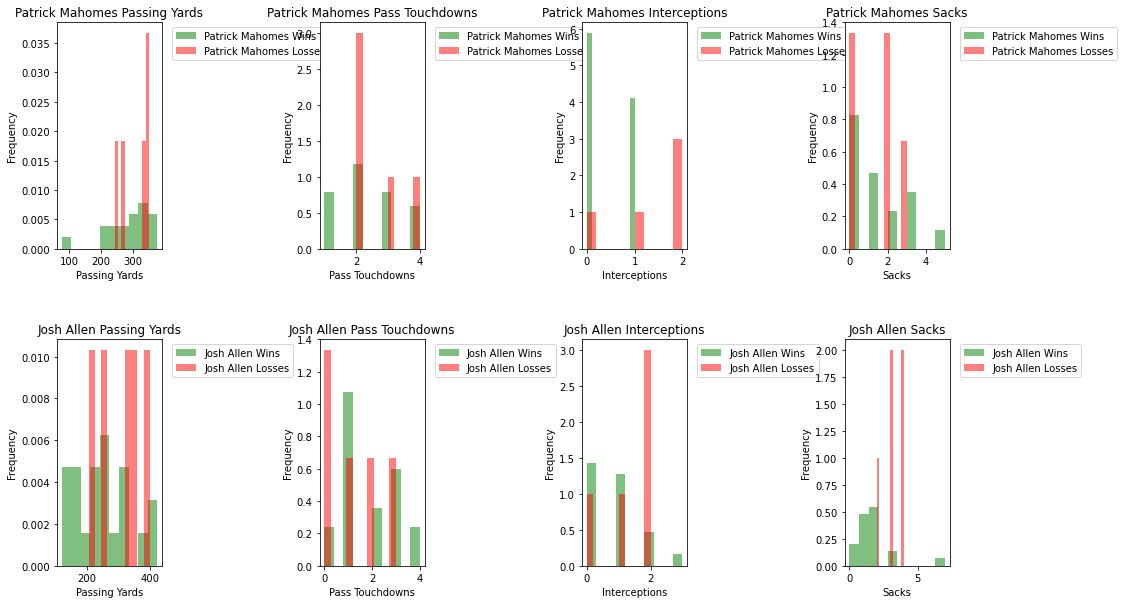

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv("QB_data_results_all_years")

label_dict = {"W": 1, "L": 0, "T": 0.5}

label = "win_loss"
data[label] = data[label].map(label_dict)

features = ["pass_touchdown", "passing_yards", "sack", "interception"]

player1 = input("Enter Player 1 name: ")
player2 = input("Enter Player 2 name: ")
train_data = data[(data['player_name'] == player1) | (data['player_name'] == player2)][['player_name'] + features + [label]]
test_data = data[(data['player_name'] == player1) | (data['player_name'] == player2)][['player_name'] + features + [label]]
train_data, test_data = train_test_split(train_data, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(train_data[features], train_data[label])

labels_test = test_data[label]
features_test = test_data[features]
predictions = model.predict(features_test)

mse = mean_squared_error(labels_test, predictions)
r2 = r2_score(labels_test, predictions)

print(f"Mean squared error: {mse:.2f}")
print(f"Coefficient of determination: {r2:.2f}")


player1_wins = features_test.loc[(test_data['player_name'] == player1) & (labels_test == 1)]
player1_losses = features_test.loc[(test_data['player_name'] == player1) & (labels_test == 0)]
player2_wins = features_test.loc[(test_data['player_name'] == player2) & (labels_test == 1)]
player2_losses = features_test.loc[(test_data['player_name'] == player2) & (labels_test == 0)]


# Create a grid of subplots with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(16, 10))
fig.subplots_adjust(hspace=0.4, wspace=1.5)

# Plot the histograms on the subplots
axs[0, 0].hist(player1_wins['passing_yards'], density=True, alpha=0.5, color="green", label=f"{player1} Wins")
axs[0, 0].hist(player1_losses['passing_yards'], density=True, alpha=0.5, color="red", label=f"{player1} Losses")
axs[0, 0].set_xlabel("Passing Yards")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title(f"{player1} Passing Yards")
axs[0, 0].legend()
axs[0, 0].legend(bbox_to_anchor=(1.05, 1))

axs[0, 1].hist(player1_wins['pass_touchdown'], density=True, alpha=0.5, color="green", label=f"{player1} Wins")
axs[0, 1].hist(player1_losses['pass_touchdown'], density=True, alpha=0.5, color="red", label=f"{player1} Losses")
axs[0, 1].set_xlabel("Pass Touchdowns")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title(f"{player1} Pass Touchdowns")
axs[0, 1].legend()
axs[0, 1].legend(bbox_to_anchor=(1.05, 1))

axs[0, 2].hist(player1_wins['interception'], density=True, alpha=0.5, color="green", label=f"{player1} Wins")
axs[0, 2].hist(player1_losses['interception'], density=True, alpha=0.5, color="red", label=f"{player1} Losses")
axs[0, 2].set_xlabel("Interceptions")
axs[0, 2].set_ylabel("Frequency")
axs[0, 2].set_title(f"{player1} Interceptions")
axs[0, 2].legend()
axs[0, 2].legend(bbox_to_anchor=(1.05, 1))

axs[0, 3].hist(player1_wins['sack'], density=True, alpha=0.5, color="green", label=f"{player1} Wins")
axs[0, 3].hist(player1_losses['sack'], density=True, alpha=0.5, color="red", label=f"{player1} Losses")
axs[0, 3].set_xlabel("Sacks")
axs[0, 3].set_ylabel("Frequency")
axs[0, 3].set_title(f"{player1} Sacks")
axs[0, 3].legend()
axs[0, 3].legend(bbox_to_anchor=(1.05, 1))

axs[1, 0].hist(player2_wins['passing_yards'], density=True, alpha=0.5, color="green", label=f"{player2} Wins")
axs[1, 0].hist(player2_losses['passing_yards'], density=True, alpha=0.5, color="red", label=f"{player2} Losses")
axs[1, 0].set_xlabel("Passing Yards")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].set_title(f"{player2} Passing Yards")
axs[1, 0].legend()
axs[1, 0].legend(bbox_to_anchor=(1.05, 1))

axs[1, 1].hist(player2_wins['pass_touchdown'], density=True, alpha=0.5, color="green", label=f"{player2} Wins")
axs[1, 1].hist(player2_losses['pass_touchdown'], density=True, alpha=0.5, color="red", label=f"{player2} Losses")
axs[1, 1].set_xlabel("Pass Touchdowns")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].set_title(f"{player2} Pass Touchdowns")
axs[1, 1].legend()
axs[1, 1].legend(bbox_to_anchor=(1.05, 1))

axs[1, 2].hist(player2_wins['interception'], density=True, alpha=0.5, color="green", label=f"{player2} Wins")
axs[1, 2].hist(player2_losses['interception'], density=True, alpha=0.5, color="red", label=f"{player2} Losses")
axs[1, 2].set_xlabel("Interceptions")
axs[1, 2].set_ylabel("Frequency")
axs[1, 2].set_title(f"{player2} Interceptions")
axs[1, 2].legend()
axs[1, 2].legend(bbox_to_anchor=(1.05, 1))

axs[1, 3].hist(player2_wins['sack'], density=True, alpha=0.5, color="green", label=f"{player2} Wins")
axs[1, 3].hist(player2_losses['sack'], density=True, alpha=0.5, color="red", label=f"{player2} Losses")
axs[1, 3].set_xlabel("Sacks")
axs[1, 3].set_ylabel("Frequency")
axs[1, 3].set_title(f"{player2} Sacks")
axs[1, 3].legend()
axs[1, 3].legend(bbox_to_anchor=(1.05, 1))

# fig.savefig("player_comparison.png")


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("QB_data_results_all_years")

label_dict = {"W": 1, "L": 0, "T": 0.5}

label = "win_loss"
data[label] = data[label].map(label_dict)

features = ["pass_touchdown", "passing_yards", "sack", "interception"]

player1 = "Davis Mills"
player2 = "Lamar Jackson"
train_data = data[(data['player_name'] == player1) | (data['player_name'] == player2)][['player_name'] + features + [label]]
test_data = data[(data['player_name'] == player1) | (data['player_name'] == player2)][['player_name'] + features + [label]]
train_data, test_data = train_test_split(train_data, test_size=0.3, random_state=42)

player_data = data[(data['player_name'] == player1) | (data['player_name'] == player2)]
labels_train = train_data[label]
features_train = train_data[features]
labels_test = test_data[label]
features_test = test_data[features]

model = LogisticRegression()
model.fit(features_train, labels_train)

predictions = model.predict_proba(features_test)[:, 1]

# win percentage
player1_win_percentage = round(np.mean(predictions[np.where(test_data['player_name'] == player1)]), 3)
player2_win_percentage = round(np.mean(predictions[np.where(test_data['player_name'] == player2)]), 3)

output_file = "win_loss_predictions.csv"
pd.DataFrame(predictions, columns=["win_loss"]).to_csv(output_file, index=False)


print(f"{player1}'s win percentage: {player1_win_percentage}")
print(f"{player2}'s win percentage: {player2_win_percentage}")
# print("Accuracy score: %.2f" % accuracy)
# print("Precision score: %.2f" % precision)
# print("Recall score: %.2f" % recall)

Davis Mills's win percentage: 0.564
Lamar Jackson's win percentage: 0.614


# Quarterback Win Percentages

This script analyzes quarterback data and produces two visualizations - a bar chart showing the top 15 quarterbacks by win percentage, and a pie chart categorizing the quarterbacks as elite, above average, or below average based on their win percentage.

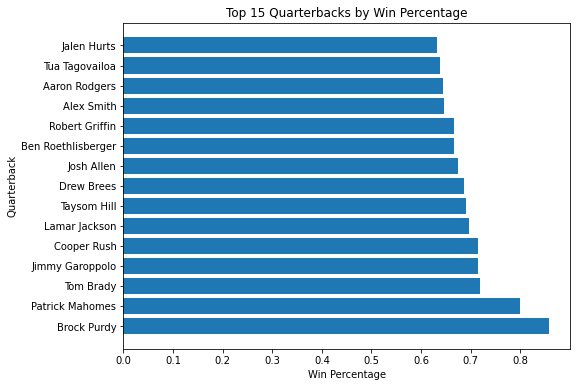

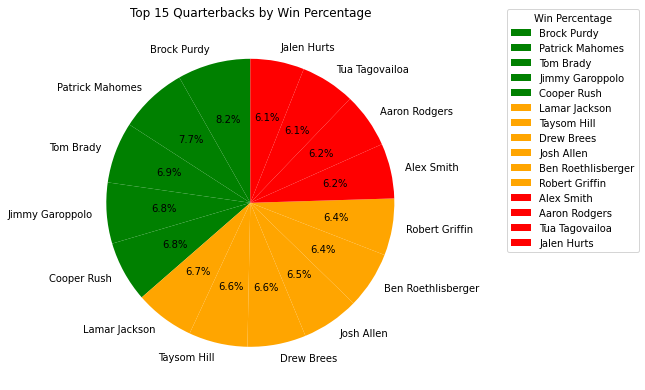

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data = pd.read_csv("QB_data_results_all_years")
label_dict = {"W": 1, "L": 0, "T": 0.5}
label = "win_loss"
data[label] = data[label].apply(lambda x: 1 if x == 'W' else 0)
features = ["pass_touchdown", "passing_yards", "sack", "interception"]
qb_data = data[['player_name'] + features + [label]].dropna()

qb_win_percentages = {}
for player in data['player_name'].unique():
#     print(player)
    player_data = data[data['player_name'] == player][['player_name'] + features + [label]].dropna()
    labels = player_data[label]
#     labels = player_data[label].astype(int)
    player_features = player_data[features]
    model = LogisticRegression()
    model.fit(player_features, labels)
    predictions = model.predict_proba(player_features)[:, 1]
    win_percentage = round(np.mean(predictions), 3)
    qb_win_percentages[player] = win_percentage

top_qbs = sorted(qb_win_percentages.items(), key=lambda x: x[1], reverse=True)[:15]
top_qbs_names = [qb[0] for qb in top_qbs]
top_qbs_win_percentages = [qb[1] for qb in top_qbs]

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_qbs_names, top_qbs_win_percentages)
ax.set_xlabel('Win Percentage')
ax.set_ylabel('Quarterback')
ax.set_title('Top 15 Quarterbacks by Win Percentage')
plt.show()

# fig.savefig("quarterback_barchart.png")

elite_qbs = [(qb[0], qb[1]) for qb in top_qbs if qb[1] > 0.7]
above_avg_qbs = [(qb[0], qb[1]) for qb in top_qbs if 0.65 < qb[1] < 0.7]
below_avg_qbs = [(qb[0], qb[1]) for qb in top_qbs if qb[1] < 0.6]

elite_color = 'green'
above_avg_color = 'orange'
below_avg_color = 'red'

fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(left=0.1, right=0.6)

labels = [qb[0] for qb in top_qbs]
sizes = [qb[1] for qb in top_qbs]
colors = [elite_color if qb in elite_qbs else above_avg_color if qb in above_avg_qbs else below_avg_color for qb in top_qbs]
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Top 15 Quarterbacks by Win Percentage')

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
# for i, (label, size) in enumerate(zip(labels, sizes)):
#     ang1, ang2 = ax.set_theta_zero_location('W'), ax.patches[i].theta2
#     x, y = ax.patches[i].center
#     if sizes[i] > 0.1:
#         ax.annotate(f"{size:.2%}", xy=(x, y), xytext=(1.2*np.sign(x), 1.2*np.sign(y)), **kw)

ax.legend(labels, title='Win Percentage', loc='center left', bbox_to_anchor=(1.2, .7))
plt.show()

# plt.savefig("quarterback_pie_charts.png")


